# COMP5318 Assignment 2
*Make sure you change the file name with your unikey*

# 1. Data set up


## 1.1 Load Data

Please upload both datasets (any file format is ok) to your google drive, and load the datasets through google drive file id in your code. If you want to use Jupyter, please submit all the dataset in an additional zip file.




### Dataset 1

In [3]:
from PIL import Image
import numpy as np
import os

In [2]:
def read_img(path):
    im = Image.open(path)
    return np.asarray(im).flatten() 

In [3]:
X1 = []
y1 = []

i = 0

for root,dirs,filenames in os.walk("Datasets/CroppedYale"): 
    for name in filenames:
        if "P00A" in name:
            X1.append(read_img("Datasets/CroppedYale//"+name[:7]+"//"+name))
            y1.append(i)
    i = i+1

In [4]:
X1 = np.array(X1)
X1.shape

(640, 32256)

### Dataset 2

In [5]:
# dataset2 processs method 

X2 = []
y2 = []
file = open("Datasets//amazon_book.review",encoding="UTF-8")    
for sentence in file:
    helper= []
    words = sentence.split(" ")
    for word in words:
        if words.index(word) == len(words)-1:
            break
        else:
            word_counter = word.split(":")
            counter = int(word_counter[1])
            real_word = word_counter[0]
            i = 0 
            while i < counter:
                helper.append(real_word)
                i=i+1
    X2.append(" ".join(helper))
    y2.append(int(float(words[-1][-4:-1])))

In [6]:
# ref from the lab
import nltk
from nltk.stem.snowball import SnowballStemmer
import re

stemmer = SnowballStemmer("english")
nltk.download("punkt")

def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]',token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\G0679\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,
                                   max_features=200000,
                                   min_df=0.2,stop_words="english",
                                   use_idf=True,
                                   tokenizer=tokenize_and_stem,
                                   ngram_range=(1,3))

X2=tfidf_vectorizer.fit_transform(X2).toarray()

C:\Users\G0679\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))




---


# 2. K-means Clustering

## 2.1 Dataset 1

### Train K-means clustering

In [8]:
from sklearn.metrics import pairwise_distances_argmin
#ref from the lab

class Kmeans():
    def __init__(self,n_clusters,metric1,rseed=2):
        self.n_clusters = n_clusters
        self.metric1 = metric1
        self.rseed = rseed
        self.cluster_centers = None
        self.labels_ = None

    def fit(self,X):
        rng = np.random.RandomState(self.rseed)
        i = rng.permutation(X.shape[0])[:self.n_clusters]
        centers = X[i]
        
        while True:
            labels = pairwise_distances_argmin(X,centers,1,self.metric1)
            new_centers = np.array([X[labels == i].mean(0) 
                                   for i in range(self.n_clusters)])
            
            if np.all(centers == new_centers):
                break
            centers = new_centers
        
        self.cluster_centers = centers
        self.labels_ = labels
        return self

In [9]:
kmeans_per_k_euclidean = [Kmeans(k,"euclidean").fit(X1) for k in range(2,11)] 
kmeans_per_k_cosine = [Kmeans(k,"cosine").fit(X1) for k in range(2,11)]

### First evaluation: Davies Bouldin Score

In [10]:
from sklearn.metrics import davies_bouldin_score
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 


In [11]:
davies_bouldin_score_euclidean = [davies_bouldin_score(X1, model.labels_) for model in kmeans_per_k_euclidean]

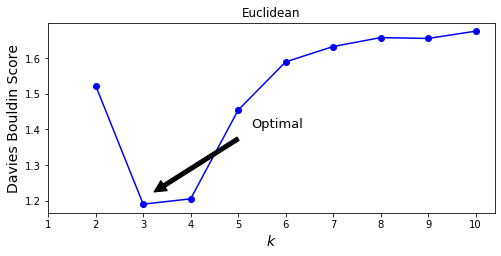

In [12]:
plt.figure(figsize=(8, 3.5)) 

plt.plot(range(2,11), davies_bouldin_score_euclidean, "bo-")
plt.xlabel("$k$",fontsize= 14)
plt.ylabel("Davies Bouldin Score",fontsize = 14)
plt.title("Euclidean")


plt.annotate('Optimal',
             xy=(3, davies_bouldin_score_euclidean[2]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )



plt.xticks(range(1,11))

plt.show()

In [13]:
davies_bouldin_score_cosine = [davies_bouldin_score(X1, model.labels_) for model in kmeans_per_k_cosine]

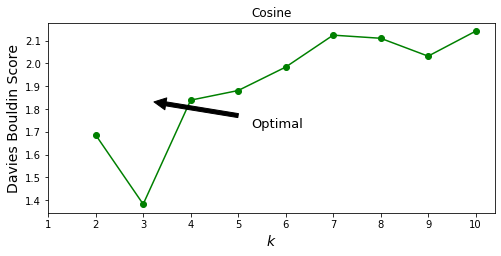

In [14]:
plt.figure(figsize=(8, 3.5)) 

plt.plot(range(2,11), davies_bouldin_score_cosine, "bo-",c="green") 
plt.xlabel("$k$",fontsize= 14)
plt.ylabel("Davies Bouldin Score",fontsize = 14) 
plt.title("Cosine")

plt.annotate('Optimal',
             xy=(3, davies_bouldin_score_cosine[2]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.xticks(range(1,11))
plt.show()

### Second evaluation: Silhouette score

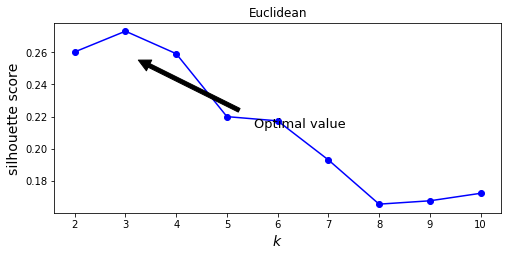

In [15]:
from sklearn.metrics import silhouette_score
plt.figure(figsize=(8, 3.5))
silhouette_scores_euclidean = [silhouette_score(X1, model.labels_,metric='euclidean')
                               for model in kmeans_per_k_euclidean]
plt.plot(range(2,11), silhouette_scores_euclidean, "bo-", label="euclidean") 
plt.xlabel("$k$", fontsize= 14)
plt.ylabel("silhouette score", fontsize =14)

plt.annotate('Optimal value',
             xy=(3, silhouette_scores_euclidean[2]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )




plt.xticks(range(2,11)) 
plt.title("Euclidean")
plt.show()

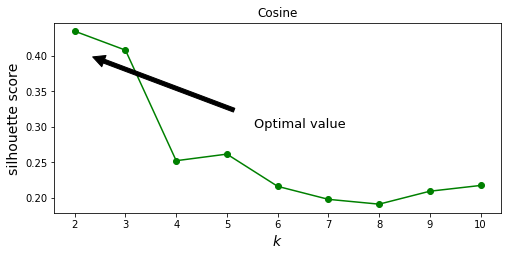

In [16]:
plt.figure(figsize=(8, 3.5))
silhouette_scores_cosine = [silhouette_score(X1,model.labels_,metric='cosine') 
                            for model in kmeans_per_k_cosine]
plt.plot(range(2,11), silhouette_scores_cosine, "bo-",c="green", label="cosine") 
plt.xlabel("$k$", fontsize= 14)
plt.ylabel("silhouette score", fontsize =14)

plt.annotate('Optimal value',
             xy=(2, silhouette_scores_cosine[1]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )


plt.xticks(range(2,11))
plt.title("Cosine")
plt.show()

## 2.2 Dataset 2

### Train K-means clustering

In [17]:
kmeans_per_k_euclidean = [Kmeans(k,"euclidean").fit(X2) for k in range(2,11)]
kmeans_per_k_cosine = [Kmeans(k,"cosine").fit(X2) for k in range(2,11)]

### First evaluation：Davies Bouldin Score

In [18]:
davies_bouldin_score_euclidean = [davies_bouldin_score(X2, model.labels_) 
                                  for model in kmeans_per_k_euclidean]



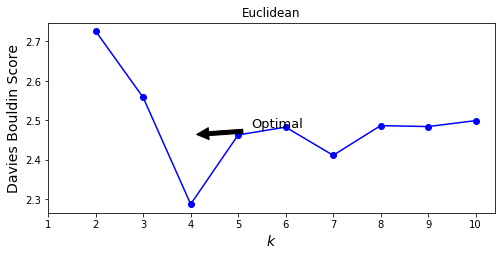

In [19]:
plt.figure(figsize=(8, 3.5)) 

plt.plot(range(2,11), davies_bouldin_score_euclidean, "bo-") 
plt.xlabel("$k$",fontsize= 14)
plt.ylabel("Davies Bouldin Score",fontsize = 14)
plt.title("Euclidean")


plt.annotate('Optimal',
             xy=(4, davies_bouldin_score_euclidean[3]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )



plt.xticks(range(1,11))

plt.show()

In [20]:
davies_bouldin_score_cosine = [davies_bouldin_score(X2, model.labels_) 
                               for model in kmeans_per_k_cosine]

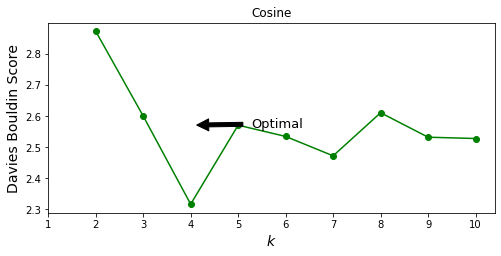

In [21]:
plt.figure(figsize=(8, 3.5)) 

plt.plot(range(2,11), davies_bouldin_score_cosine, "bo-",c="green")
plt.xlabel("$k$",fontsize= 14)
plt.ylabel("Davies Bouldin Score",fontsize = 14)
plt.title("Cosine")


plt.annotate('Optimal',
             xy=(4, davies_bouldin_score_cosine[3]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )



plt.xticks(range(1,11))

plt.show()

### Second evaluation: Silhouette Score

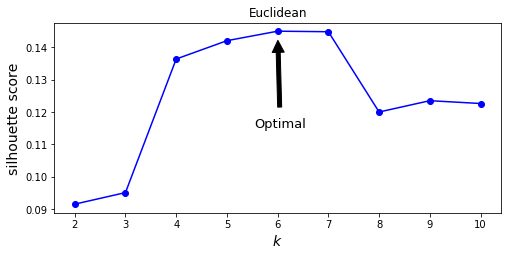

In [22]:
from sklearn.metrics import silhouette_score
plt.figure(figsize=(8, 3.5))
silhouette_scores_euclidean = [silhouette_score(X2, model.labels_,metric="euclidean")
                               for model in kmeans_per_k_euclidean]
plt.plot(range(2,11), silhouette_scores_euclidean, "bo-", label="euclidean") 
plt.xlabel("$k$", fontsize= 14)
plt.ylabel("silhouette score", fontsize =14)

plt.annotate('Optimal',
             xy=(6, silhouette_scores_euclidean[5]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )




plt.xticks(range(2,11)) 
plt.title("Euclidean") 
plt.show()

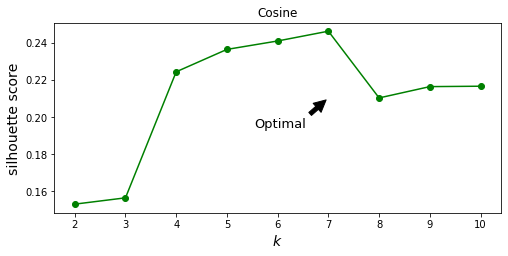

In [23]:
plt.figure(figsize=(8, 3.5))
silhouette_scores_cosine = [silhouette_score(X2,model.labels_,metric="cosine") 
                            for model in kmeans_per_k_cosine]
plt.plot(range(2,11), silhouette_scores_cosine, "bo-",c="green", label="cosine") 
plt.xlabel("$k$", fontsize= 14)
plt.ylabel("silhouette score", fontsize =14)

plt.annotate('Optimal',
             xy=(7, silhouette_scores_cosine[6]),
             xytext=(0.5, 0.5),
             textcoords='figure fraction',
             fontsize=13,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )


plt.xticks(range(2,11))
plt.title("Cosine")
plt.show()



---


# 3. Hierachical Clustering

## 3.1 Dataset 1

### Train Hierarchical clustering 

In [24]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import complete, dendrogram

In [25]:
## Referenece: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
## (Sklearn Website)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
## Referenece: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
## (Sklearn Website)

#### Euclidean

##### Complete-link

In [26]:
hierarchical_euclidean_complete = AgglomerativeClustering(n_clusters = 2, distance_threshold = None, affinity = 'euclidean', linkage='complete')
hierarchical_euclidean_complete.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Single-link

In [27]:
hierarchical_euclidean_single = AgglomerativeClustering(n_clusters = 2, distance_threshold = None, affinity = 'euclidean', linkage='single')
hierarchical_euclidean_single.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Average-link

In [28]:
hierarchical_euclidean_average = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'euclidean', linkage='average')
hierarchical_euclidean_average.fit(X1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

#### Cosine

##### Complete-link

In [29]:
hierarchical_cosine_complete = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'cosine', linkage='complete')
hierarchical_cosine_complete.fit(X1)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Single-link

In [30]:
hierarchical_cosine_single = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'cosine', linkage='single')
hierarchical_cosine_single.fit(X1)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Average-Link

In [31]:
hierarchical_cosine_average = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'cosine', linkage='average')
hierarchical_cosine_average.fit(X1)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

#### Manhattan

##### Complete-link

In [32]:
hierarchical_manhattan_complete = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'manhattan', linkage='complete')
hierarchical_manhattan_complete.fit(X1)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Single-link

In [33]:
hierarchical_manhattan_single = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'manhattan', linkage='single')
hierarchical_manhattan_single.fit(X1)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Average-Link

In [34]:
hierarchical_manhattan_average = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'manhattan', linkage='average')
hierarchical_manhattan_average.fit(X1)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

### First evaluation : Silhouette Score

#### Euclidean

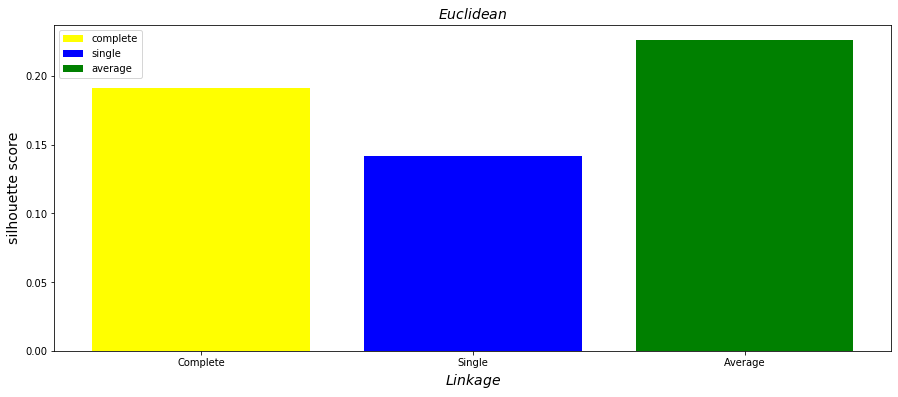

In [35]:
plt.figure(figsize=(15,6))

silhouette_score_euclidean_complete = [silhouette_score(X1, hierarchical_euclidean_complete.labels_,metric="euclidean")]

plt.bar("Complete", silhouette_score_euclidean_complete, color='yellow',label="complete")

silhouette_score_euclidean_single = [silhouette_score(X1, hierarchical_euclidean_single.labels_,metric="euclidean")]
plt.bar("Single", silhouette_score_euclidean_single, color='blue',label="single")

silhouette_score_euclidean_average = [silhouette_score(X1, hierarchical_euclidean_average.labels_,metric="euclidean")]
plt.bar("Average", silhouette_score_euclidean_average, color='green',label="average")

plt.title("$Euclidean$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("silhouette score", fontsize =14)
plt.legend()
plt.show()

#### Cosine

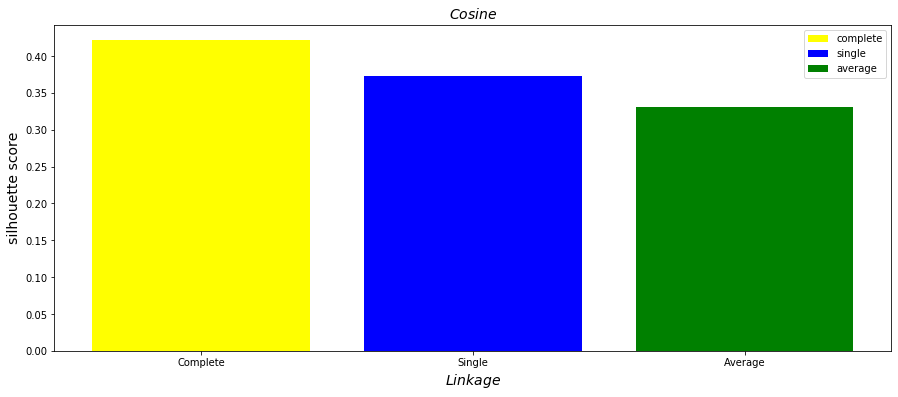

In [36]:
plt.figure(figsize=(15,6))

silhouette_score_cosine_complete = [silhouette_score(X1, hierarchical_cosine_complete.labels_,metric="cosine")]

plt.bar("Complete", silhouette_score_cosine_complete, color='yellow',label="complete")

silhouette_score_cosine_single = [silhouette_score(X1, hierarchical_cosine_single.labels_,metric="cosine")]
plt.bar("Single", silhouette_score_cosine_single, color='blue',label="single")

silhouette_score_cosine_average = [silhouette_score(X1, hierarchical_cosine_average.labels_,metric="cosine")]
plt.bar("Average", silhouette_score_cosine_average, color='green',label="average")

plt.title("$Cosine$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("silhouette score", fontsize =14)
plt.legend()
plt.show()

#### Manhattan

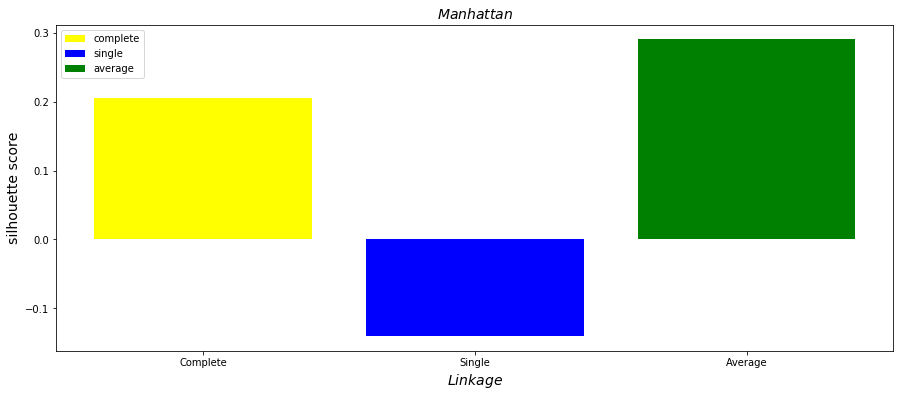

In [37]:
plt.figure(figsize=(15,6))

silhouette_score_manhattan_complete = [silhouette_score(X1, hierarchical_manhattan_complete.labels_,metric="manhattan")]

plt.bar("Complete", silhouette_score_manhattan_complete, color='yellow',label="complete")

silhouette_score_manhattan_single = [silhouette_score(X1, hierarchical_manhattan_single.labels_,metric="manhattan")]
plt.bar("Single", silhouette_score_manhattan_single, color='blue',label="single")

silhouette_score_manhattan_average = [silhouette_score(X1, hierarchical_manhattan_average.labels_,metric="manhattan")]
plt.bar("Average", silhouette_score_manhattan_average, color='green',label="average")

plt.title("$Manhattan$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("silhouette score", fontsize =14)
plt.legend()
plt.show()

### Second evaluation： Davies Bouldin Score

#### Euclidean

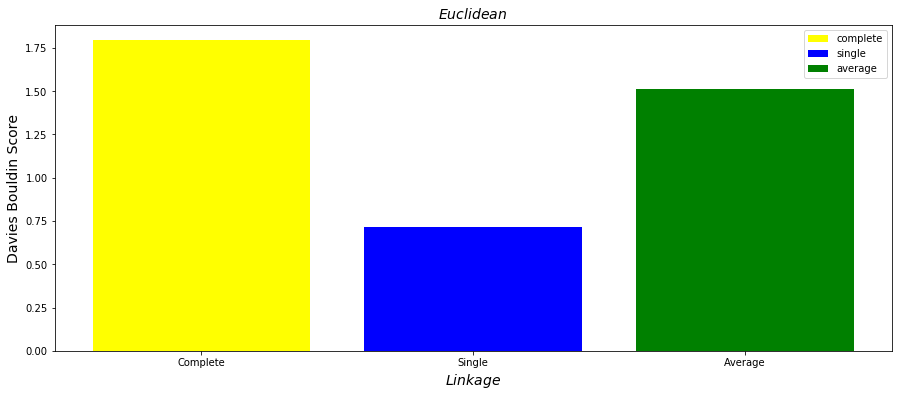

In [38]:
plt.figure(figsize=(15,6))

davies_bouldin_score_euclidean_complete = [davies_bouldin_score(X1, hierarchical_euclidean_complete.labels_)]

plt.bar("Complete", davies_bouldin_score_euclidean_complete, color='yellow',label="complete")

davies_bouldin_score_euclidean_single = [davies_bouldin_score(X1, hierarchical_euclidean_single.labels_)]
plt.bar("Single", davies_bouldin_score_euclidean_single, color='blue',label="single")

davies_bouldin_score_euclidean_average = [davies_bouldin_score(X1, hierarchical_euclidean_average.labels_)]
plt.bar("Average", davies_bouldin_score_euclidean_average, color='green',label="average")

plt.title("$Euclidean$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("Davies Bouldin Score", fontsize =14)
plt.legend()
plt.show()

#### Cosine

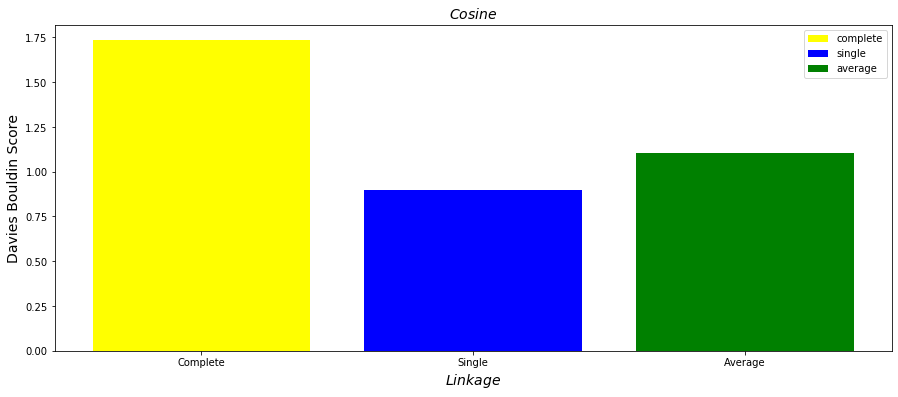

In [39]:
plt.figure(figsize=(15,6))

davies_bouldin_score_cosine_complete = [davies_bouldin_score(X1, hierarchical_cosine_complete.labels_)]

plt.bar("Complete", davies_bouldin_score_cosine_complete, color='yellow',label="complete")

davies_bouldin_score_cosine_single = [davies_bouldin_score(X1, hierarchical_cosine_single.labels_)]
plt.bar("Single", davies_bouldin_score_cosine_single, color='blue',label="single")

davies_bouldin_score_cosine_average = [davies_bouldin_score(X1, hierarchical_cosine_average.labels_)]
plt.bar("Average", davies_bouldin_score_cosine_average, color='green',label="average")

plt.title("$Cosine$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("Davies Bouldin Score", fontsize =14)
plt.legend()
plt.show()

#### Manhattan

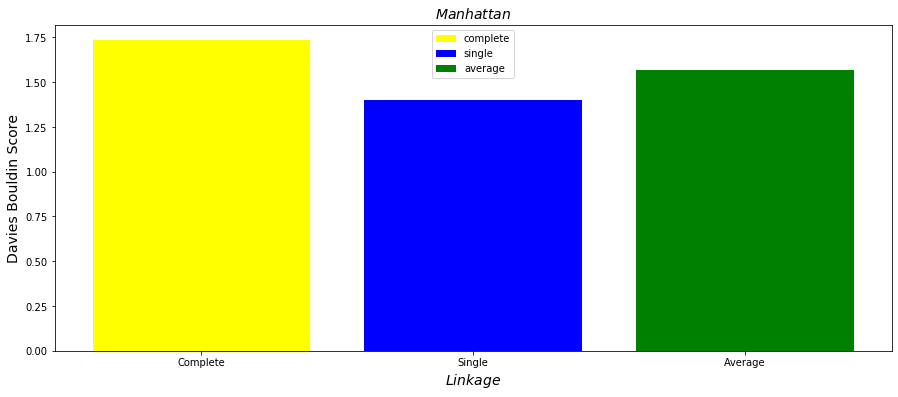

In [40]:
plt.figure(figsize=(15,6))

davies_bouldin_score_manhattan_complete = [davies_bouldin_score(X1, hierarchical_manhattan_complete.labels_)]

plt.bar("Complete", davies_bouldin_score_cosine_complete, color='yellow',label="complete")

davies_bouldin_score_manhattan_single = [davies_bouldin_score(X1, hierarchical_manhattan_single.labels_)]
plt.bar("Single", davies_bouldin_score_manhattan_single, color='blue',label="single")

davies_bouldin_score_manhattan_average = [davies_bouldin_score(X1, hierarchical_manhattan_average.labels_)]
plt.bar("Average", davies_bouldin_score_manhattan_average, color='green',label="average")

plt.title("$Manhattan$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("Davies Bouldin Score", fontsize =14)
plt.legend()
plt.show()

## 3.2 Dataset 2

### Train Hierarchical clustering 

#### Euclidean

##### Complete-link

In [41]:
hierarchical_euclidean_complete = AgglomerativeClustering(n_clusters = 2, distance_threshold = None, affinity = 'euclidean', linkage='complete')
hierarchical_euclidean_complete.fit(X2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [42]:
# import sys
# sys.setrecursionlimit(30000)

##### Single-link

In [43]:
hierarchical_euclidean_single = AgglomerativeClustering(n_clusters = 2, distance_threshold = None, affinity = 'euclidean', linkage='single')
hierarchical_euclidean_single.fit(X2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Average-link

In [44]:
hierarchical_euclidean_average = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'euclidean', linkage='average')
hierarchical_euclidean_average.fit(X2)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

#### Cosine

##### Complete-link

In [45]:
X2=X2+0.00000001 

In [46]:
hierarchical_cosine_complete = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'cosine', linkage='complete')
hierarchical_cosine_complete.fit(X2)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Single-link

In [47]:
hierarchical_cosine_single = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'cosine', linkage='single')
hierarchical_cosine_single.fit(X2)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Average-Link

In [48]:
hierarchical_cosine_average = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'cosine', linkage='average')
hierarchical_cosine_average.fit(X2)

AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

#### Manhattan

##### Complete-link

In [49]:
X2=X2-0.00000001

In [50]:
hierarchical_manhattan_complete = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'manhattan', linkage='complete')
hierarchical_manhattan_complete.fit(X2)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Single-link

In [51]:
hierarchical_manhattan_single = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'manhattan', linkage='single')
hierarchical_manhattan_single.fit(X2)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

##### Average-Link

In [52]:
hierarchical_manhattan_average = AgglomerativeClustering(n_clusters = 2, distance_threshold=None, affinity = 'manhattan', linkage='average')
hierarchical_manhattan_average.fit(X2)

AgglomerativeClustering(affinity='manhattan', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

### First evaluation: Silhouette Score

#### Euclidean

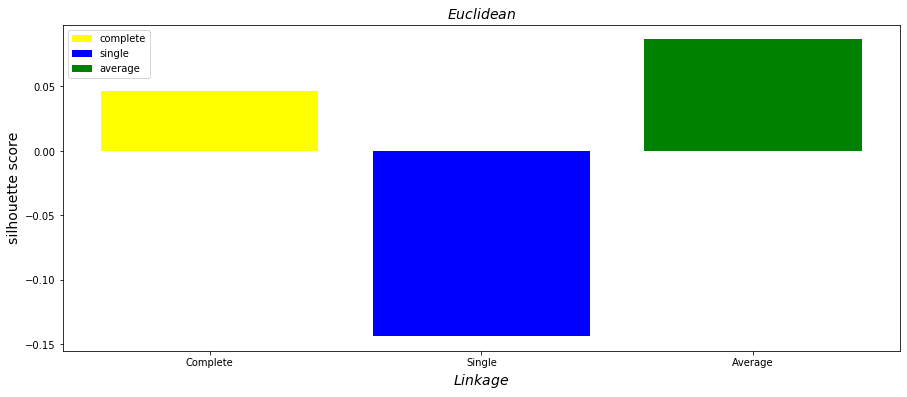

In [53]:
plt.figure(figsize=(15,6))

silhouette_score_euclidean_complete = [silhouette_score(X2, hierarchical_euclidean_complete.labels_,metric="euclidean")]

plt.bar("Complete", silhouette_score_euclidean_complete, color='yellow',label="complete")

silhouette_score_euclidean_single = [silhouette_score(X2, hierarchical_euclidean_single.labels_,metric="euclidean")]
plt.bar("Single", silhouette_score_euclidean_single, color='blue',label="single")

silhouette_score_euclidean_average = [silhouette_score(X2, hierarchical_euclidean_average.labels_,metric="euclidean")]
plt.bar("Average", silhouette_score_euclidean_average, color='green',label="average")

plt.title("$Euclidean$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("silhouette score", fontsize =14)
plt.legend()
plt.show()

#### Cosine

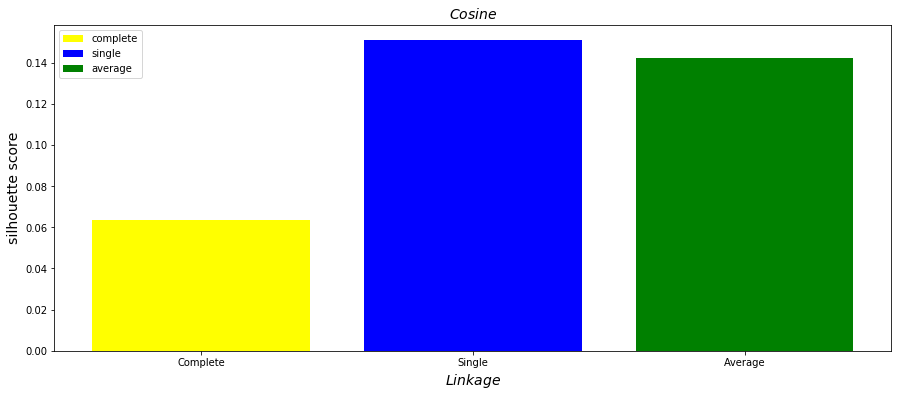

In [54]:
plt.figure(figsize=(15,6))

silhouette_score_cosine_complete = [silhouette_score(X2, hierarchical_cosine_complete.labels_,metric="cosine")]

plt.bar("Complete", silhouette_score_cosine_complete, color='yellow',label="complete")

silhouette_score_cosine_single = [silhouette_score(X2, hierarchical_cosine_single.labels_,metric="cosine")]
plt.bar("Single", silhouette_score_cosine_single, color='blue',label="single")

silhouette_score_cosine_average = [silhouette_score(X2, hierarchical_cosine_average.labels_,metric="cosine")]
plt.bar("Average", silhouette_score_cosine_average, color='green',label="average")

plt.title("$Cosine$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("silhouette score", fontsize =14)
plt.legend()
plt.show()

#### Manhattan

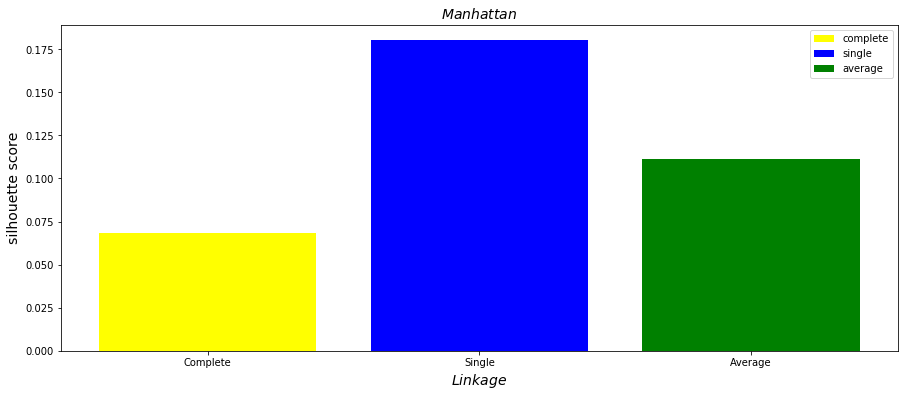

In [55]:
plt.figure(figsize=(15,6))

silhouette_score_manhattan_complete = [silhouette_score(X2, hierarchical_manhattan_complete.labels_,metric="manhattan")]

plt.bar("Complete", silhouette_score_manhattan_complete, color='yellow',label="complete")

silhouette_score_manhattan_single = [silhouette_score(X2, hierarchical_manhattan_single.labels_,metric="manhattan")]
plt.bar("Single", silhouette_score_manhattan_single, color='blue',label="single")

silhouette_score_manhattan_average = [silhouette_score(X2, hierarchical_manhattan_average.labels_,metric="manhattan")]
plt.bar("Average", silhouette_score_manhattan_average, color='green',label="average")

plt.title("$Manhattan$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("silhouette score", fontsize =14)
plt.legend()
plt.show()

### Second evaluation： Davies Bouldin Score

#### Euclidean

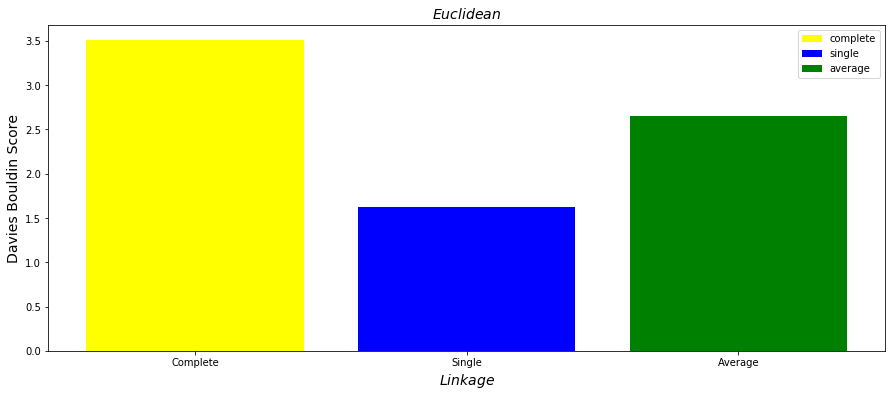

In [56]:
plt.figure(figsize=(15,6))

davies_bouldin_score_euclidean_complete = [davies_bouldin_score(X2, hierarchical_euclidean_complete.labels_)]

plt.bar("Complete", davies_bouldin_score_euclidean_complete, color='yellow',label="complete")

davies_bouldin_score_euclidean_single = [davies_bouldin_score(X2, hierarchical_euclidean_single.labels_)]
plt.bar("Single", davies_bouldin_score_euclidean_single, color='blue',label="single")

davies_bouldin_score_euclidean_average = [davies_bouldin_score(X2, hierarchical_euclidean_average.labels_)]
plt.bar("Average", davies_bouldin_score_euclidean_average, color='green',label="average")

plt.title("$Euclidean$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("Davies Bouldin Score", fontsize =14)
plt.legend()
plt.show()

#### Cosine

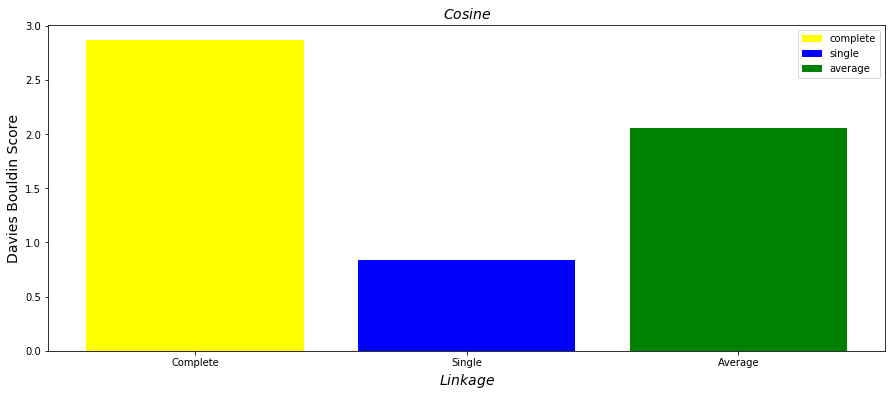

In [57]:
plt.figure(figsize=(15,6))

davies_bouldin_score_cosine_complete = [davies_bouldin_score(X2, hierarchical_cosine_complete.labels_)]

plt.bar("Complete", davies_bouldin_score_cosine_complete, color='yellow',label="complete")

davies_bouldin_score_cosine_single = [davies_bouldin_score(X2, hierarchical_cosine_single.labels_)]
plt.bar("Single", davies_bouldin_score_cosine_single, color='blue',label="single")

davies_bouldin_score_cosine_average = [davies_bouldin_score(X2, hierarchical_cosine_average.labels_)]
plt.bar("Average", davies_bouldin_score_cosine_average, color='green',label="average")

plt.title("$Cosine$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("Davies Bouldin Score", fontsize =14)
plt.legend()
plt.show()

#### Manhattan

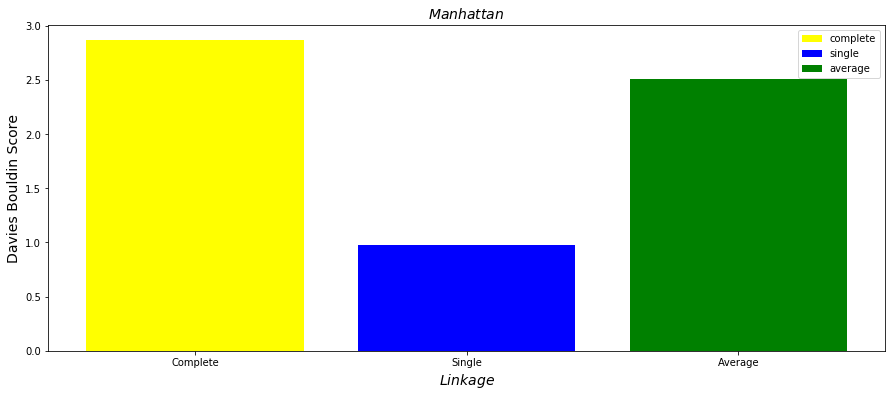

In [58]:
plt.figure(figsize=(15,6))

davies_bouldin_score_manhattan_complete = [davies_bouldin_score(X2, hierarchical_manhattan_complete.labels_)]

plt.bar("Complete", davies_bouldin_score_cosine_complete, color='yellow',label="complete")

davies_bouldin_score_manhattan_single = [davies_bouldin_score(X2, hierarchical_manhattan_single.labels_)]
plt.bar("Single", davies_bouldin_score_manhattan_single, color='blue',label="single")

davies_bouldin_score_manhattan_average = [davies_bouldin_score(X2, hierarchical_manhattan_average.labels_)]
plt.bar("Average", davies_bouldin_score_manhattan_average, color='green',label="average")

plt.title("$Manhattan$", fontsize = 14)
plt.xlabel("$Linkage$", fontsize = 14)
plt.ylabel("Davies Bouldin Score", fontsize =14)
plt.legend()
plt.show()



---


# 4. DBSCAN Clustering

## 4.1 Dataset 1

### Train DBSCAN clustering 

In [59]:
from sklearn.cluster import DBSCAN

### First evaluation Davis Bouldin Score 

In [60]:
Eps= [0.1,0.5,1,2,3,4,5,10,15,20,25,30]
mini_X1 = X1/300

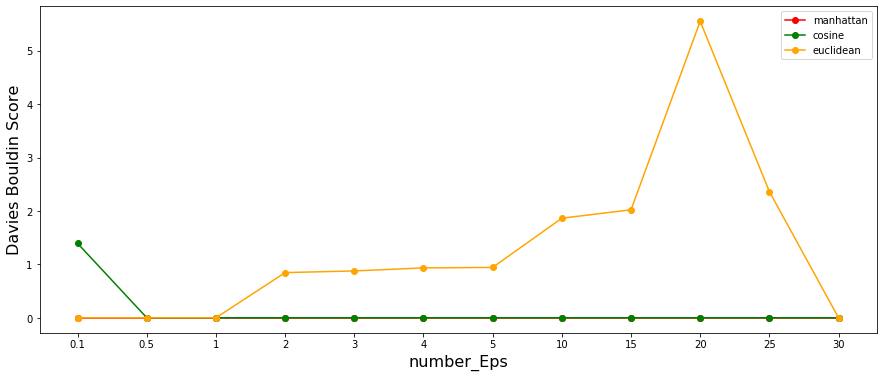

In [61]:
manhattan_scores= []                                    
cosine_scores= []
euclidean_scores =[]
#manhanttan distanc

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='manhattan').fit(mini_X1) for input in Eps]:
    try:
        manhattan_scores.append(davies_bouldin_score(mini_X1,Dbs_model.labels_))
    except:
        manhattan_scores.append(0)

    
#cosine similarity

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='cosine').fit(mini_X1) for input in Eps]:
    try:
        cosine_scores.append(davies_bouldin_score(mini_X1,Dbs_model.labels_))
    except:
        cosine_scores.append(0)

                                        
#euclidean

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='euclidean').fit(mini_X1) for input in Eps]:
    try:
        euclidean_scores.append(davies_bouldin_score(mini_X1,Dbs_model.labels_))
    except:
        euclidean_scores.append(0)

plt.figure(figsize=(15,6))
plt.ylabel("Davies Bouldin Score", fontsize =16)                                      
plt.xlabel("number_Eps", fontsize =16)  
plt.xticks(range(0,len(Eps)),Eps)



plt.plot(range(0, len(Eps)),manhattan_scores,"bo-", c="red", label="manhattan" )
plt.plot(range(0, len(Eps)),cosine_scores,"bo-", c="green", label="cosine" )
plt.plot(range(0, len(Eps)),euclidean_scores,"bo-", c="orange", label="euclidean" )
plt.legend()
plt.show()

### Second evaluation Silhouette Score

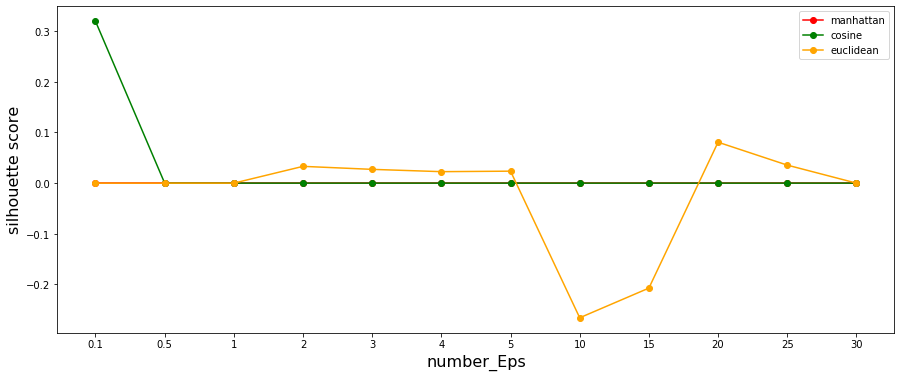

In [62]:
from sklearn.metrics import silhouette_score

plt.figure(figsize=(15,6))
plt.ylabel("silhouette score", fontsize =16)                                        
plt.xlabel("number_Eps", fontsize =16) 
plt.xticks(range(0,len(Eps)),Eps)

manhattan_scores= []                                    
cosine_scores= []
euclidean_scores =[]
#manhanttan distance

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='manhattan').fit(mini_X1) for input in Eps]:
    try:
        manhattan_scores.append(silhouette_score(mini_X1, Dbs_model.labels_,metric="manhattan"))
    except:
        manhattan_scores.append(0)

    
#cosine similarity

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='cosine').fit(mini_X1) for input in Eps]:
    try:
        cosine_scores.append(silhouette_score(mini_X1, Dbs_model.labels_,metric="cosine"))
    except:
        cosine_scores.append(0)

                                                   
#euclidean


for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='euclidean').fit(mini_X1) for input in Eps]:
    try:
        euclidean_scores.append(silhouette_score(mini_X1, Dbs_model.labels_,metric="euclidean"))
    except:
        euclidean_scores.append(0)

       


plt.plot(range(0, len(Eps)),manhattan_scores,"bo-", c="red", label="manhattan" )
plt.plot(range(0, len(Eps)),cosine_scores,"bo-", c="green", label="cosine" )
plt.plot(range(0, len(Eps)),euclidean_scores,"bo-", c="orange", label="euclidean")
plt.legend()
plt.show()

## 4.2 Dataset 2

### Train DBSCAN clustering 

In [63]:
Eps= [0.1,0.5,1,2,3,4,5,10,15,20,25,30]

### First evaluation Calinski Harabasz Score

In [64]:

from sklearn.metrics import calinski_harabasz_score


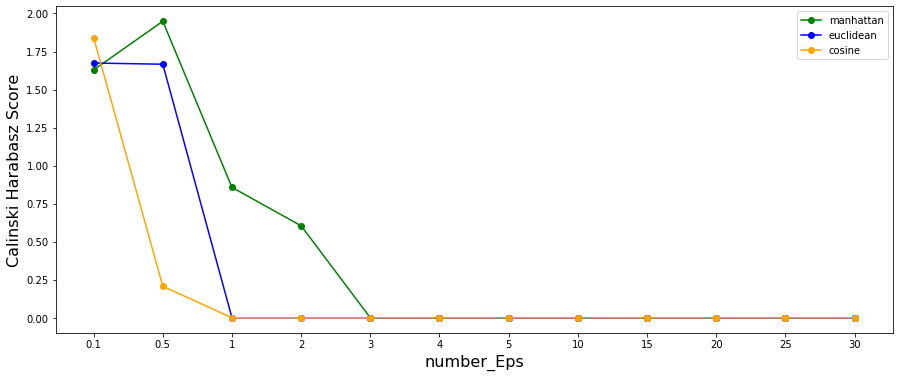

In [65]:
plt.figure(figsize=(15,6))




manhattan_scores= []                                    
cosine_scores= []
euclidean_scores =[]

plt.ylabel("Calinski Harabasz Score", fontsize =16)                                      
plt.xlabel("number_Eps", fontsize =16) 

plt.xticks(range(0,len(Eps)),Eps)



for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='euclidean').fit(X2) for input in Eps]:
    try:
        euclidean_scores.append(calinski_harabasz_score(np.array(y2).reshape(-1,1),Dbs_model.labels_))
    except:
        euclidean_scores.append(0)

 
         
 #cosine

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='cosine').fit(X2) for input in Eps]:
    try:
        cosine_scores.append(calinski_harabasz_score(np.array(y2).reshape(-1,1),Dbs_model.labels_))
    except:
        cosine_scores.append(0)


         
#manhattan
calinski_harabasz_score_manhattan = []
for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='manhattan').fit(X2) for input in Eps]:
    try:
        manhattan_scores.append(calinski_harabasz_score(np.array(y2).reshape(-1,1),Dbs_model.labels_))
    except:
        manhattan_scores.append(0)
plt.plot(range(0,len(Eps)),manhattan_scores, "bo-", c = "green", label="manhattan")
plt.plot(range(0,len(Eps)),euclidean_scores, "bo-", c = "blue", label="euclidean")         
plt.plot(range(0,len(Eps)),cosine_scores, "bo-", c = "orange", label="cosine")         

plt.legend()
plt.show()
    

### Second evaluation  Silhouette Score

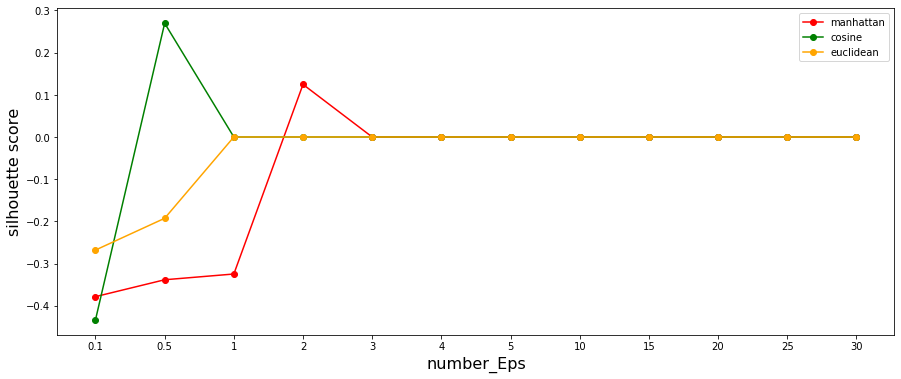

In [66]:


plt.figure(figsize=(15,6))
plt.ylabel("silhouette score", fontsize =16)                                        
plt.xlabel("number_Eps", fontsize =16) 
plt.xticks(range(0,len(Eps)),Eps)

manhattan_scores= []                                    
cosine_scores= []
euclidean_scores =[]
#manhanttan distanc

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='manhattan').fit(X2) for input in Eps]:
    try:
        manhattan_scores.append(silhouette_score(X2, Dbs_model.labels_,metric="manhattan"))
    except:
        manhattan_scores.append(0)

    
#cosine similarity

for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='cosine').fit(X2) for input in Eps]:
    try:
        cosine_scores.append(silhouette_score(X2, Dbs_model.labels_,metric="cosine"))
    except:
        cosine_scores.append(0)

                                                   
#euclidean


for Dbs_model in [DBSCAN(eps=input, min_samples=3,metric='euclidean').fit(X2) for input in Eps]:
    try:
        euclidean_scores.append(silhouette_score(X2, Dbs_model.labels_,metric="euclidean"))
    except:
        euclidean_scores.append(0)

       


plt.plot(range(0, len(Eps)),manhattan_scores,"bo-", c="red", label="manhattan" )
plt.plot(range(0, len(Eps)),cosine_scores,"bo-", c="green", label="cosine" )
plt.plot(range(0, len(Eps)),euclidean_scores,"bo-", c="orange", label="euclidean")
plt.legend()
plt.show()